In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
# Load the Iris dataset (you can replace it with any other dataset)
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [3]:
# For simplicity, we will use only two features (you can change this as needed)
X = data[['sepal length (cm)', 'sepal width (cm)']]
y = data['target']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Preprocessing: Standardize the data (optional but can be helpful for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [8]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.16997965789997296


In [9]:
# Cross-validation
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Cross-validation Scores: {cross_val_scores}')
print(f'Mean Cross-validation Score: {np.mean(cross_val_scores)}')

Cross-validation Scores: [0.79430209 0.70988244 0.84293227 0.58210246 0.51387946]
Mean Cross-validation Score: 0.6886197450960443


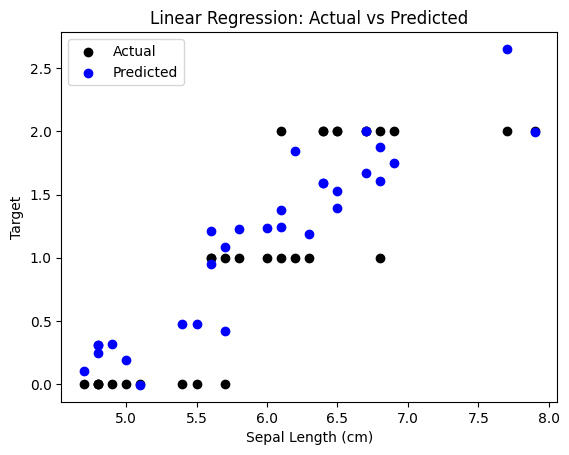

In [10]:
# Visualization
plt.scatter(X_test['sepal length (cm)'], y_test, color='black', label='Actual')
plt.scatter(X_test['sepal length (cm)'], y_pred, color='blue', label='Predicted')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Target')
plt.legend()
plt.title('Linear Regression: Actual vs Predicted')
plt.show()